# Лабораторная работа №1
###Выполнила: Атанова Ульяна, гр.932004

Датасет: https://archive.ics.uci.edu/dataset/222/bank+marketing




Признаки:

*   age	Integer
*   job	Categorical	(categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
*   marital	Categorical	 (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
*  education	Categorical	(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
*   default	Binary
*   balance	Integer
*   housing	Binary
*  loan	Binary
*  contact	Categorical	(categorical: 'cellular','telephone')
*  day_of_week	Date

In [185]:
import matplotlib.pyplot as plt
import numpy as np

from pandas import (
    DataFrame,
    read_csv,
    concat,
)
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    accuracy_score,
)
from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler
)
from sklearn.model_selection import train_test_split

from keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
)
from keras.models import Sequential
from keras.layers import Dense

In [186]:
df: DataFrame = read_csv('/content/bank-additional-full.csv', sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [187]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [189]:
for key in df.head():
        t = type(
            df[key].iloc[0]
        ).__name__
        print(f"{key} - {t}")

age - int64
job - str
marital - str
education - str
default - str
housing - str
loan - str
contact - str
month - str
day_of_week - str
duration - int64
campaign - int64
pdays - int64
previous - int64
poutcome - str
emp.var.rate - float64
cons.price.idx - float64
cons.conf.idx - float64
euribor3m - float64
nr.employed - float64
y - str


In [190]:
strAttributes = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for key in strAttributes:
    print(f"{key} : {df[key].unique()}")

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']


In [191]:
match_dict = {'no': 0, 'yes': 1}

df['y'] = df['y'].map(match_dict)

In [192]:
onehotencoder = OneHotEncoder()

for elem in strAttributes:
    data = onehotencoder.fit_transform(df[[elem]].values)
    df = concat(
        [
            df,
            DataFrame(
                data.toarray(),
                columns=list(onehotencoder.categories_[0]),
            )
        ],
        axis=1,
    )

df = df.drop(strAttributes, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   duration             41188 non-null  int64  
 2   campaign             41188 non-null  int64  
 3   pdays                41188 non-null  int64  
 4   previous             41188 non-null  int64  
 5   emp.var.rate         41188 non-null  float64
 6   cons.price.idx       41188 non-null  float64
 7   cons.conf.idx        41188 non-null  float64
 8   euribor3m            41188 non-null  float64
 9   nr.employed          41188 non-null  float64
 10  y                    41188 non-null  int64  
 11  admin.               41188 non-null  float64
 12  blue-collar          41188 non-null  float64
 13  entrepreneur         41188 non-null  float64
 14  housemaid            41188 non-null  float64
 15  management           41188 non-null 

In [193]:
y = df['y']

#scaling
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(df.drop(['y'], axis=1))

In [194]:
X1, X_, y1, y_ = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=45
)
X2, X3, y2, y3 = train_test_split(
    X_,
    y_,
    stratify=y_,
    test_size=0.5,
    random_state=46
)

print(f'Train : {X1.shape}, Test : {X2.shape}, Val: {X3.shape}')

Train : (32950, 63), Test : (4119, 63), Val: (4119, 63)


In [195]:
classifier = Sequential()
classifier.add(
    Dense(
        32,
        activation='relu',
        input_dim=X1.shape[1],
    )
)
classifier.add(
    Dense(
        16,
        activation='relu',
    )
)
classifier.add(
    Dense(
        1,
        activation='sigmoid',
    )
)
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                2048      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2593 (10.13 KB)
Trainable params: 2593 (10.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [196]:
classifier.compile(
    loss='binary_crossentropy',
    optimizer='RMSProp',
    metrics='accuracy',
)

In [197]:
early_stop = EarlyStopping(
    monitor='val_accuracy', #отслеживаем accuracy
    patience=10, #количество эпох на которых отслеживается изменение
    mode='max', #максимизируем accuracy
    verbose=1,
)
checkpoint = ModelCheckpoint(
    '/content/checkFile.hdf5',
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True,
)

In [198]:
classifier_history = classifier.fit(
    X1,
    y1,
    batch_size=500, #кол-во записей на эпоху
    validation_data=(X3, y3),
    callbacks=[early_stop, checkpoint],
    epochs=90,
)

Epoch 1/90
63/66 [===========================>..] - ETA: 0s - loss: 0.3418 - accuracy: 0.8853
Epoch 1: val_accuracy improved from -inf to 0.89488, saving model to /content/checkFile.hdf5
66/66 [==============================] - 1s 6ms/step - loss: 0.3387 - accuracy: 0.8861 - val_loss: 0.2892 - val_accuracy: 0.8949
Epoch 2/90
60/66 [==========================>...] - ETA: 0s - loss: 0.2798 - accuracy: 0.8974

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.89488 to 0.89731, saving model to /content/checkFile.hdf5
66/66 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.8977 - val_loss: 0.2766 - val_accuracy: 0.8973
Epoch 3/90
64/66 [============================>.] - ETA: 0s - loss: 0.2711 - accuracy: 0.8994
Epoch 3: val_accuracy improved from 0.89731 to 0.89755, saving model to /content/checkFile.hdf5
66/66 [==============================] - 0s 4ms/step - loss: 0.2712 - accuracy: 0.8995 - val_loss: 0.2702 - val_accuracy: 0.8975
Epoch 4/90
52/66 [======================>.......] - ETA: 0s - loss: 0.2635 - accuracy: 0.9010
Epoch 4: val_accuracy improved from 0.89755 to 0.89852, saving model to /content/checkFile.hdf5
66/66 [==============================] - 0s 4ms/step - loss: 0.2651 - accuracy: 0.9011 - val_loss: 0.2647 - val_accuracy: 0.8985
Epoch 5/90
49/66 [=====================>........] - ETA: 0s - loss: 0.2593 - accuracy: 0.9013
Epoch 5: val_accuracy did not improve from

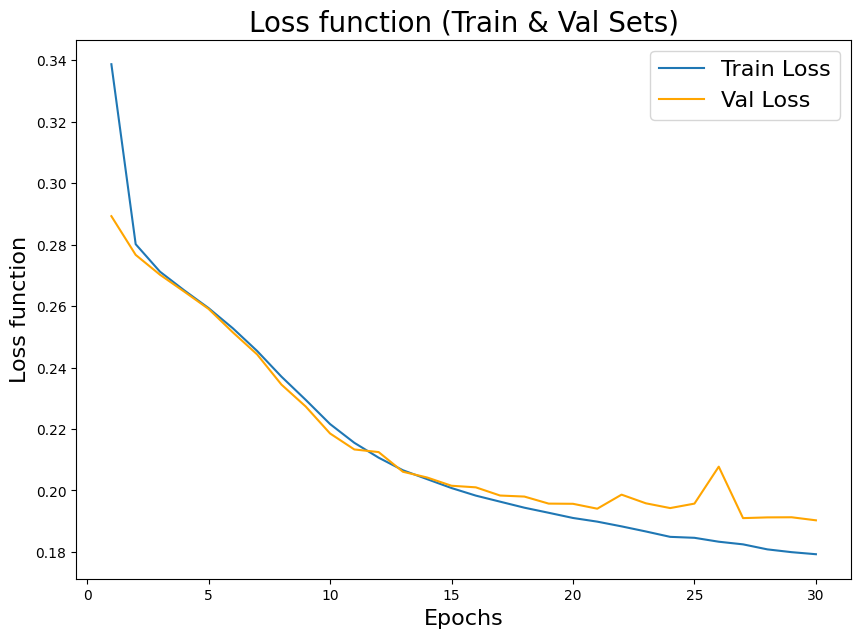

In [199]:
loss_function = classifier_history.history['loss']
val_loss_function = classifier_history.history['val_loss']
epochs = range(
    1,
    len(loss_function) + 1,
)

plt.rcParams['figure.figsize'] = [10, 7]
plt.title('Loss function (Train & Val Sets)', fontsize=20)
plt.plot(
    epochs,
    loss_function,
    label='Train Loss',
)
plt.plot(
    epochs,
    val_loss_function,
    color='orange',
    label='Val Loss',
)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss function', fontsize=16)
plt.legend(fontsize=16)
plt.show()

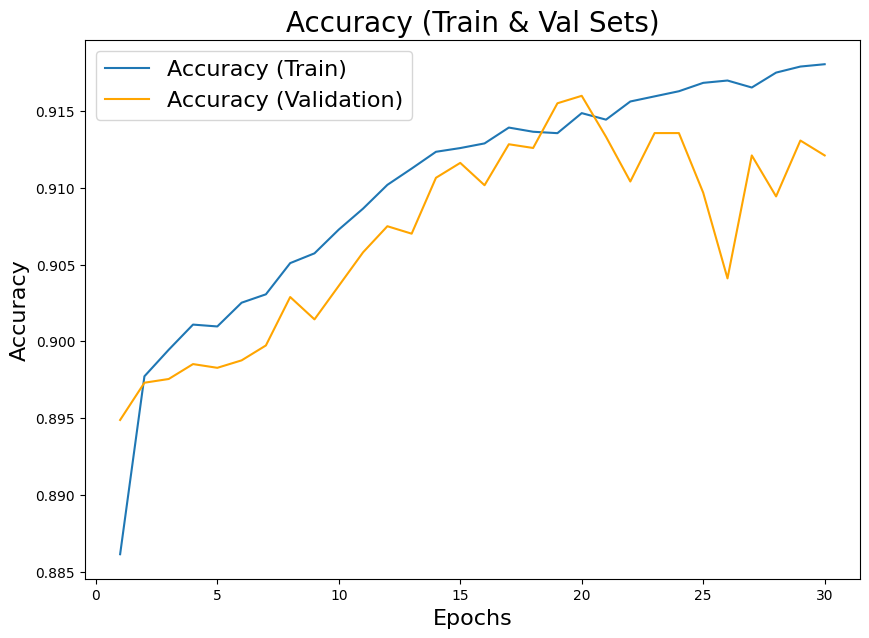

In [200]:
acc = classifier_history.history['accuracy']
val_acc = classifier_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.title('Accuracy (Train & Val Sets)', fontsize=20)
plt.plot(epochs, acc, label='Accuracy (Train)')
plt.plot(epochs, val_acc, color='orange', label='Accuracy (Validation)')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [201]:
classifier.load_weights('/content/checkFile.hdf5')

results = classifier.evaluate(
    X2,
    y2,
    return_dict=True,
)

y_pred = classifier.predict(X2)

print(results)

129/129 [==============================] - 0s 2ms/step
{'loss': 0.19941270351409912, 'accuracy': 0.9058023691177368}


In [202]:
auc = roc_auc_score(
    y2,
    y_pred,
)
print(auc)

0.9343707250341996


In [203]:
y_pred = (y_pred >= 0.5).astype(int)

In [204]:
print(f"binary precision: {precision_score(y2, y_pred, zero_division=1)}")
print(f"binary recall: {recall_score(y2, y_pred)}")
print(f"normalized accuracy: {accuracy_score(y2, y_pred)}")

binary precision: 0.611764705882353
binary recall: 0.4482758620689655
normalized accuracy: 0.9058023792182569
